## Шаг 7: Визуализация в Streamlit

### Цель:
Это заключительная и важная часть проекта, в которой вам предстоит интегрировать все компоненты в единую систему с использованием **Streamlit** для визуализации, **RAG-модели** для обработки запросов, а также **MistralAI** для генерации ответов. Задача заключается в том, чтобы создать интерфейс чат-бота, который будет взаимодействовать с пользователем, извлекая релевантные данные из векторной базы **Qdrant**, генерируя соответствующие промпты для **MistralAI** и выводя ответы на запросы пользователя.

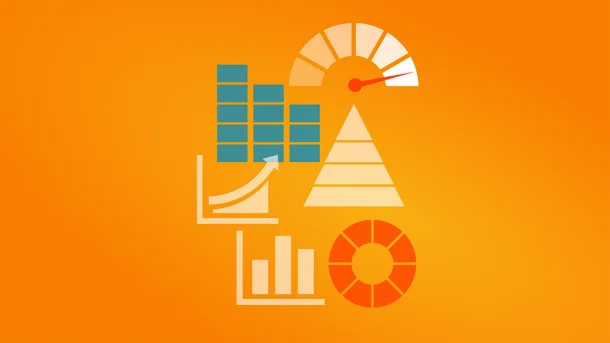
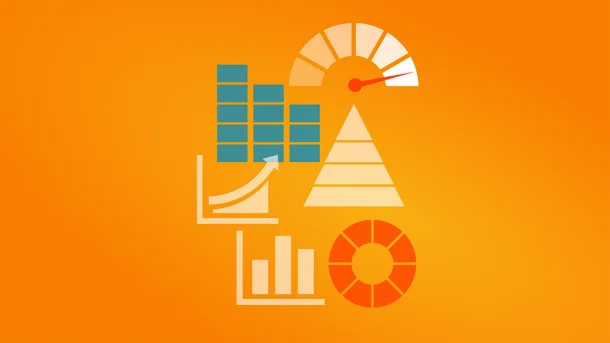

## Создание чат-бота

В ходе выполнения задания вы научитесь:
1. Работать с **Streamlit** для создания интерактивных веб-приложений и визуализаций.
2. Реализовывать чат-ботов с использованием **Streamlit Chat**, что позволит интегрировать диалоговые интерфейсы с генеративными моделями.
3. Интегрировать **RAG-систему**, которая использует базы данных с эмбеддингами для извлечения информации, а также генерирует ответы с помощью **MistralAI**.
4. Оптимизировать работу с памятью для управления историей сообщений и контекстом взаимодействия с пользователем.

**Задачи:**
1. **Поиск релевантных чанков**: Извлечение информации из векторной базы **Qdrant** с помощью векторного поиска.
2. **Создание промпта для LLM**: Формирование правильного запроса с контекстом для генерации точных и информированных ответов.
3. **Чат-бот с интеграцией MistralAI**: Реализация диалога с пользователем, генерация ответов на основе запроса и информации из базы.

**Почему это важно**:
Создание интерфейса для работы с **RAG-системой** в **Streamlit** позволяет эффективно взаимодействовать с пользователями, делая процесс поиска и получения информации простым и удобным. Это задание поможет вам интегрировать теоретические знания и практические навыки, создавая высокоинтерактивные и функциональные приложения, которые могут быть использованы в реальных системах поиска и рекомендаций.
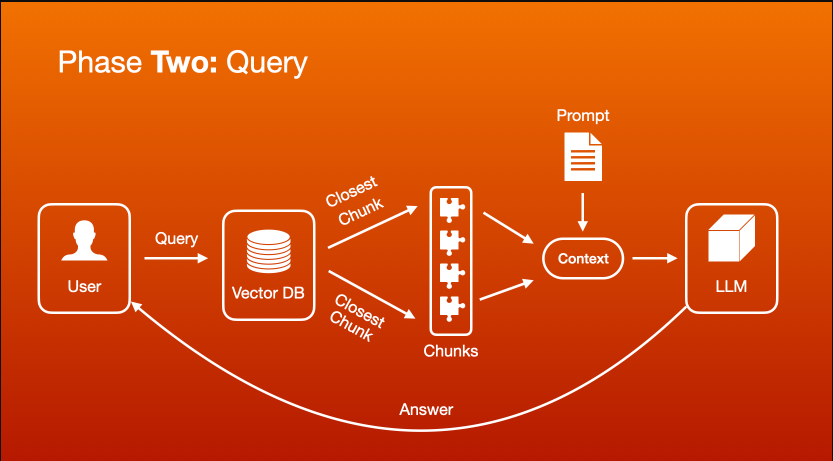
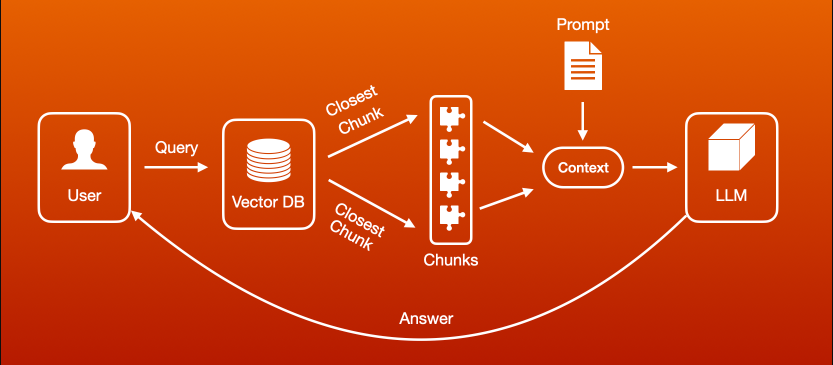

### Теория о **Streamlit** в рамках построения RAG-системы

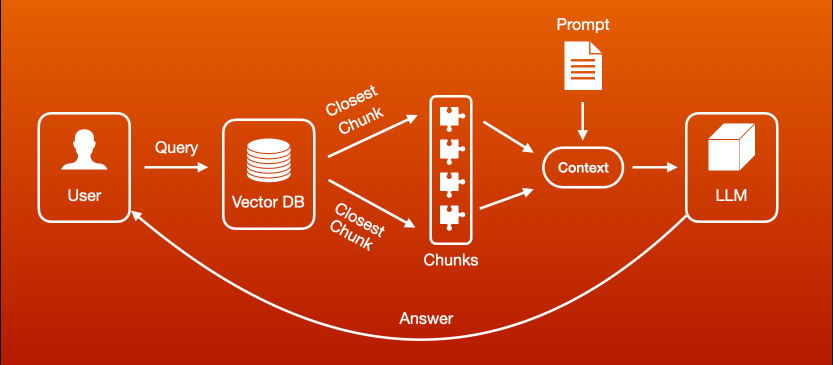

**Streamlit** — это мощная библиотека для создания интерактивных веб-приложений, особенно полезная для проектов в области данных и машинного обучения. Она позволяет легко и быстро создать пользовательский интерфейс для взаимодействия с моделями машинного обучения, обеспечивая простой способ отображения визуализаций и создания интерактивных интерфейсов.

В рамках нашей RAG-системы, **Streamlit** позволяет создать интерфейс для общения с пользователем, где:
1. Пользователь может задавать вопросы.
2. Система ищет релевантные данные в базе, генерирует промпт для модели и получает ответ от **MistralAI**.
3. Ответы и контекст сохраняются и отображаются в реальном времени.

Используя **Streamlit**, можно легко интегрировать все компоненты в единую рабочую систему, где взаимодействие с пользователем происходит через чат-бота, который использует знания из векторной базы и генеративную модель.

---

### **Streamlit Chat** — возможность создания чат-бота

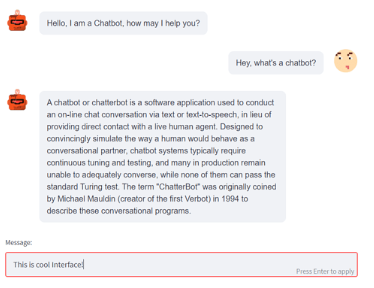

**Streamlit Chat** — это специальная библиотека, которая позволяет создавать чат-ботов в приложениях **Streamlit**. С помощью этой библиотеки можно удобно отображать сообщения, отличать ответы пользователя от ответов модели, а также настраивать визуализацию интерфейса общения.

В рамках нашего задания **Streamlit Chat** используется для отображения истории сообщений и визуализации процесса общения с моделью. Бот отвечает на запросы пользователя, и все ответы, как и ввод пользователя, отображаются в чате.

---

### Советы по созданию визуализации в **PyCharm**:

1. **Создание интерфейса с Streamlit**:
   - Убедитесь, что **Streamlit** и **Streamlit Chat**правильно установлен в вашем проекте. Вы можете установить его с помощью команды:
     ```bash
     pip install streamlit
     pip install streamlit_chat
     ```
   - Для запуска приложения используйте команду в терминале:
     ```bash
     streamlit run your_script.py
     ```
   - PyCharm автоматически откроет ваш браузер, где будет отображаться интерфейс приложения.

2. **API-доступ**:
   Визуализация использует **API** для взаимодействия с **Qdrant** и **MistralAI**. Вам нужно будет получить доступ к этим API, настроив правильные ключи и URL в вашем коде.
   
   - Для **Qdrant** настройте клиента с правильным URL и API-ключом:
     ```python
     qdrant_client = QdrantClient(url="https://your-qdrant-instance", api_key="your-api-key")
     ```
   - Для **MistralAI** используйте API-ключ для доступа к модели:
     ```python
     llm = ChatMistralAI(
         model="mistral-small-latest", 
         api_key="your-api-key",
         streaming=True
     )
     ```

3. **Обработка сообщений**:
   - Важно правильно организовать хранение и отображение истории сообщений. В **Streamlit** это можно сделать с помощью `session_state`, чтобы сохранить данные между запросами пользователя.
   - Когда пользователь отправляет сообщение, его нужно сохранять в `st.session_state.messages`, а также обновлять `st.session_state.memory_size` для отслеживания использования памяти.

4. **Обновление интерфейса**:
   - После отправки запроса и получения ответа от модели необходимо перезагрузить интерфейс с помощью `st.rerun()`, чтобы обновить чат и отобразить новые сообщения.

5. **Интерактивность и управление памятью**:
   - Важно учитывать, что ограничение памяти (например, `max_memory_size`) помогает контролировать количество данных, которые система запоминает для контекста. Когда память переполняется, можно выводить предупреждение пользователю, что память достигла лимита.

---

### О **Streamlit Cloud**

**Streamlit Cloud** — это облачная платформа для развертывания приложений, созданных с помощью **Streamlit**. Она позволяет разработчикам и исследователям быстро развернуть свои проекты и поделиться ими с другими. Основное преимущество **Streamlit Cloud** — это простота использования: вы можете развернуть приложение с минимальными усилиями, без необходимости в настройке серверов или управлении инфраструктурой.

**Ключевые особенности Streamlit Cloud:**
1. **Быстрое развертывание**: После того как ваше приложение готово, вы можете развернуть его в облаке с помощью нескольких команд, и оно будет доступно в интернете через уникальный URL.
2. **Автоматическое обновление**: Когда вы обновляете код приложения в репозитории, изменения автоматически отображаются в вашем облачном приложении.
3. **Простота подключения к внешним данным**: **Streamlit Cloud** поддерживает работу с внешними API и базами данных, что идеально подходит для задач, связанных с векторными базами данных или интеграцией с моделями ИИ.
4. **Удобство совместной работы**: Платформа позволяет легко делиться своими приложениями с другими пользователями или коллегами, давая им возможность взаимодействовать с вашим проектом в реальном времени.

Для вашего проекта **RAG-системы** и чат-бота это означает, что вы можете не только разработать приложение локально в **PyCharm**, но и развернуть его в облаке для широкого доступа, предоставляя пользователям возможность взаимодействовать с вашим чат-ботом через удобный веб-интерфейс.

Streamlit Cloud упрощает процесс развертывания и делания проектов доступными для всех заинтересованных сторон, а также дает возможность делиться своими решениями с коллегами или даже с пользователями по всему миру.

---

### Заключение:

**Streamlit** предоставляет мощный и удобный способ для создания визуализаций и взаимодействия с пользователем. В нашем случае он служит интерфейсом для **RAG-системы**, позволяя пользователю задавать вопросы, получать ответы от **MistralAI**, а также работать с данными из **Qdrant**. Благодаря простоте интеграции с Python и интуитивно понятному интерфейсу, Streamlit позволяет быстро разрабатывать и тестировать приложения с языковыми моделями и базами данных.

## Примерный код для визуализации чат-бота

### Структура файлов
```
rag_system/
├── app/
│   ├── __init__.py
│   ├── rag_utils.py  # Вся функциональность
├── streamlit_app.py  # Интерфейс Streamlit
├── requirements.txt
```

### 1. `app/rag_utils.py`

Этот файл содержит функции для работы с Qdrant, генерации промптов и инициализации диалога.

---

### 2. `streamlit_app.py`

Этот файл реализует интерфейс на Streamlit.

```python
import streamlit as st
from langchain_mistralai.chat_models import ChatMistralAI
from langchain.memory import ConversationSummaryMemory
from langchain.chains import ConversationChain
from app.rag_utils import create_rag_prompt
from streamlit_chat import message


# Основная функция общения с моделью
def start_messaging(rag_top_k=5, max_memory_size=4096):
    # Настраиваем LLM
    llm = ChatMistralAI(
        model="mistral-small-latest",
        api_key='#####',
        streaming=True
    )

    conversation = ConversationChain(
        llm=llm,
        memory=ConversationSummaryMemory(llm=llm),
        verbose=True
    )

    # Инициализация переменных
    if "memory_size" not in st.session_state:
        st.session_state.memory_size = 0
    if "context_documents" not in st.session_state:
        st.session_state.context_documents = []
    if "messages" not in st.session_state:
        st.session_state.messages = []

    # Заголовок
    st.title("Чат с моделью")

    # Кнопка для очистки чата
    if st.button("Очистить чат"):
        st.session_state.messages = []
        st.session_state.memory_size = 0
        st.session_state.context_documents = []
        st.experimental_rerun()

    # Отображение истории сообщений
    for i, message_data in enumerate(st.session_state.messages):
        if message_data['role'] == 'user':
            message(
                message_data['text'],
                is_user=True,
                key=f"user_{i}",
                avatar_style="thumbs",
                seed=i,
            )
        else:
            message(
                message_data['text'],
                is_user=False,
                key=f"model_{i}",
                avatar_style="bottts",
                seed=i,
            )

    # Поле ввода сообщения
    with st.form(key="chat_form"):
        user_input = st.text_input(
            "Введите сообщение",
            placeholder="Например, какие курсы подходят для аналитиков данных?",
            key="user_input"
        )
        submitted = st.form_submit_button("Отправить")

    if submitted and user_input:
        # Сохраняем сообщение пользователя
        st.session_state.messages.append({"role": "user", "text": user_input})

        # Создаём RAG-подсказку
        prompt = create_rag_prompt(user_input, top_k=rag_top_k)

        # Загружаем новую память
        new_memory = conversation.memory.load_memory_variables({})['history']
        new_memory_size = len(new_memory)

        # Проверяем лимит памяти
        if st.session_state.memory_size + new_memory_size <= max_memory_size:
            st.session_state.context_documents.append(new_memory)
            st.session_state.memory_size += new_memory_size
            response = conversation.predict(input=prompt)
        else:
            st.warning("Достигнут предел памяти, дальнейшее накопление прекращено.")
            response = conversation.predict(input=user_input)

        # Сохраняем ответ модели
        st.session_state.messages.append({"role": "bot", "text": response})

        # Перезагружаем интерфейс, очищая поле ввода
        st.rerun()


# Запуск Streamlit
if __name__ == "__main__":
    start_messaging()
```

## Заключение (последний шаг)

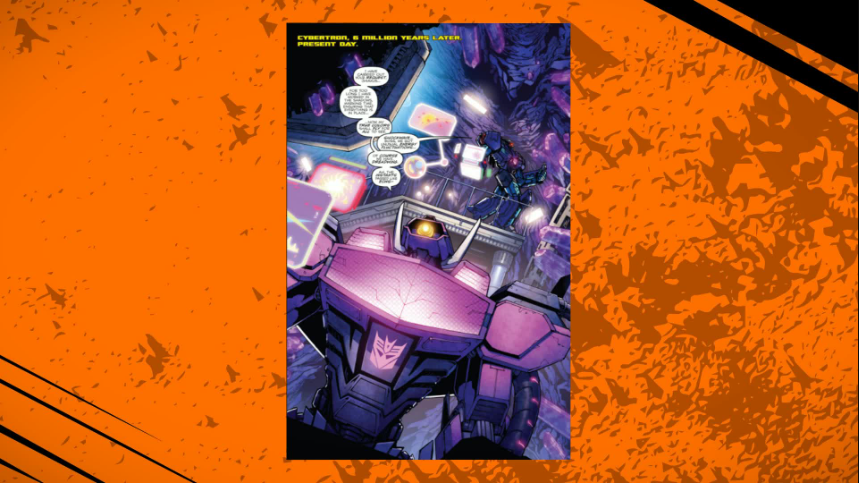

Поздравляем с завершением работы над **RAG-системой** и созданием **чат-бота**! На данном этапе мы создали рабочую версию чат-бота, которая эффективно взаимодействует с пользователями, используя информацию из векторной базы данных **Qdrant** и генерирует ответы с помощью модели **MistralAI**. Это уже полноценный инструмент для обработки запросов и предоставления релевантной информации о курсах.

Однако, стоит отметить, что эта версия находится на **стадии пре-альфа**. Мы достигли основного функционала, но существует множество возможностей для улучшений:
1. **Настройка и улучшение промптов**: Один из ключевых моментов — настройка запросов к модели. Мы можем подстраивать их для улучшения качества ответов, добавлять дополнительные фильтры или уточнения для получения более точной информации.
2. **Подключение более мощных моделей**: В будущем можно интегрировать более производительные языковые модели для повышения качества генерации ответов и увеличения точности при поиске в базе данных. Можно попробовать использовать ChatGPT 1o или даже DeepSeek.
3. **Оптимизация производительности и функционала**: Можно улучшить работу с памятью, добавить дополнительные возможности для взаимодействия с пользователем, интегрировать новые источники данных и улучшить обработку сложных запросов.
4. **Работа с zero-shot классификацией и структуризацией**: От данных критически зависит то, как будет работать модель. В этой задача создана упрощенная RAG-система, которая работает не всегда точно. Чтобы улучшить точность, нужно работать с данными, мы полностью автоматизировали процесс, вручную мы с даннами вообще не работали (разве что удалили одну ссылку на несуществующий курс), а разметка данных - это, как правило, 80% времени при обучении модели. Можно лучше подобрать классы для классификации, по смыслу разобрать текст, подобрать другую модель классификации и многое другое. Полезная статья про разметку данных: [habr.com](https://habr.com/ru/articles/678524/).

Этот результат — хорошая основа для дальнейших разработок, а также отличная возможность для того, чтобы взять этот проект за основу и использовать его в своем портфолио. Система демонстрирует хорошие результаты в обработке запросов и предоставлении релевантной информации, что является ценным навыком для реальных проектов в области **NLP**, **поисковых систем** и **генерации текста**.

Не забывайте, что на этом проекте можно продолжать работать, улучшая функциональность и качество ответов, что сделает его более мощным инструментом для использования в реальных продуктах или научных исследованиях.